# Explore and preprocess
Run file before prediction models

In [30]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# read file and store as dataframe
df_original = pd.read_csv('data.csv', header=0, sep=';')
df_original.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# check dimension
df_original.shape

(4424, 37)

In [32]:
# check variable types
df_original.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

### Dependent variable

In [33]:
# a closer look at the target class
df_original['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

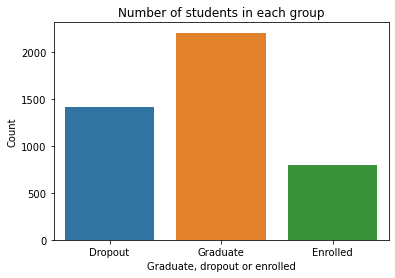

In [34]:
# check Target distribution
axes = sns.countplot(x=df_original['Target'], data=df_original)

plt.title('Number of students in each group')
plt.xlabel('Graduate, dropout or enrolled')
plt.ylabel('Count')
plt.show()

In [12]:
# returns true for columns with missing values 
df_original.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [36]:
# exploring arbritrary discrete variables 

# qualifications
#print(df_original['Previous qualification'].value_counts())
#print(sorted(df_original['Previous qualification'].unique()))

# nationality
#print(df_original['Nacionality'].value_counts())
#print(sorted(df_original['Nacionality'].unique()))

# age
print(df_original["Age at enrollment"].value_counts())
print(sorted(df_original['Age at enrollment'].unique()))

# mothers occupation
#print(df_original["Mother's occupation"].value_counts())
#print(sorted(df_original["Mother's occupation"].unique()))

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
30      49
35      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
49      13
42      13
46      12
48      11
51       7
53       7
54       7
17       5
55       5
52       4
58       3
59       3
60       2
57       2
61       1
70       1
62       1
Name: Age at enrollment, dtype: int64
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 70]


In [38]:
# drop rows that are enrolled
df = df_original[df_original.Target != 'Enrolled']

In [6]:
df['Target'] = df['Target'].map({'Dropout':0, 'Graduate':1})

In [41]:
df.shape

(3630, 37)

## Encoding cathegorical variables 
#### use on X_train
Using sklearn's one-hot encoder (to achieve better accurasy??)

In [7]:
# Application mode is a discrete variable where the numbers are not related to each other
# and a one-hot encoder can be applied 
df['Application mode'].value_counts()

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
57       1
27       1
Name: Application mode, dtype: int64

In [36]:
app_mode = df['Application mode']
app_mode = app_mode.to_frame()

#type(app_mode)
#app_mode.shape

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
app_mode_encoded = onehot_encoder.fit_transform(app_mode)

# summarize transformed data
print(app_mode_encoded.shape)
print(app_mode_encoded[:5, :])

(4424, 18)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


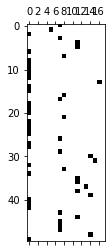

In [43]:
#app_mode_encoded = pd.DataFrame(app_mode_encoded)
#type(app_mode_encoded)
app_mode_encoded_square = app_mode_encoded[0:50,:]
plt.spy(app_mode_encoded_square)
plt.show()

## Split into train and test for X (independent varibles) and y (dependent varaibles)

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)